In [55]:
import pickle
import os
import sys
import matplotlib.pyplot as plt
from math import floor
import numpy as np
import scipy.ndimage as ndimage

sys.path.append('../utils')
sys.path.append('../visualization')

from utils import get_corr_table, get_weights

In [6]:
# Read the best parameters configuration for each of the dimensionality reduction techniques
dataset_name = 'mnist'
reduced_X_best = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/reduced/reduced_X_best.pkl', 'rb'))
X_train = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/processed/X_train.pkl', 'rb'))

# Calculate the correlation with the original features
# Calculate variation of each component
weights = get_weights(reduced_X_best, n_components=150)

# Calculate correlation with original features
df_corrs, df_corrs_avg = get_corr_table(reduced_X_best, X_train, abs=False, weighted=True, weights=weights)

train = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/split/X_train.pkl', 'rb'))

In [93]:
# Highlight the most correlated pixels

df_corrs_avg = df_corrs_avg.reset_index()

most_correlated_pixels = {}
for key in df_corrs_avg.keys()[1:]:
    most_correlated_pixels[key] = df_corrs_avg.sort_values(by=key, ascending=False)['index'].values

def plot_most_correlated_pixels(dim_technique):

    fig = plt.figure(figsize=(20, 5))

    # plot train data highlighting the most correlated pixels
    for number in range(train.shape[0])[:12]:
        plt.subplot(2, 6, number + 1)
        plt.imshow(train[number].reshape(28, 28), cmap='gray_r')

        heatmap_image = ndimage.gaussian_filter(df_corrs_avg[dim_technique].values.reshape(28, 28),
                                                        sigma=(10, 10),
                                                        order=0)
        plt.imshow(heatmap_image, cmap='bwr', alpha=0.7)


    fig.text(0.5, 1, dim_technique, ha='center', fontsize=20)

    # Add colorbar
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='bwr'), ax=fig.axes)
    cbar.set_label('Correlation')
    
    #plt.tight_layout()
    plt.show()

### Heatmap

The images show a heatmap superimposed on the first instances of the train set. The intensity of each pixel in the heatmap reflects its correlation with the data projected onto the reduced spaces obtained with each of the dimensionality reduction techniques.

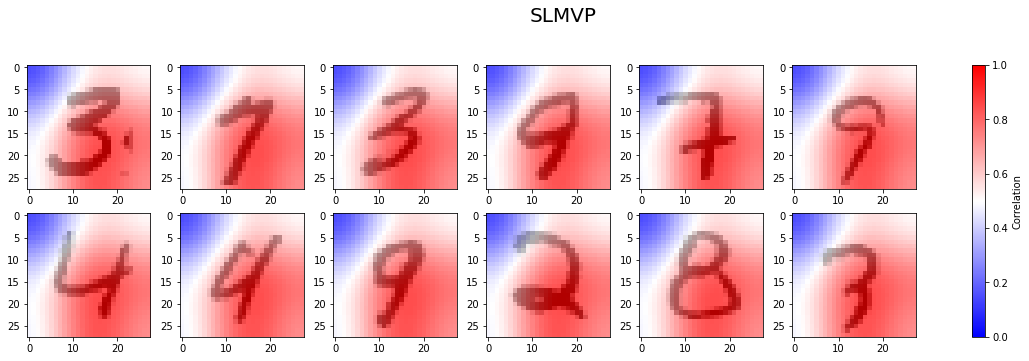

In [94]:
plot_most_correlated_pixels(dim_technique='SLMVP')

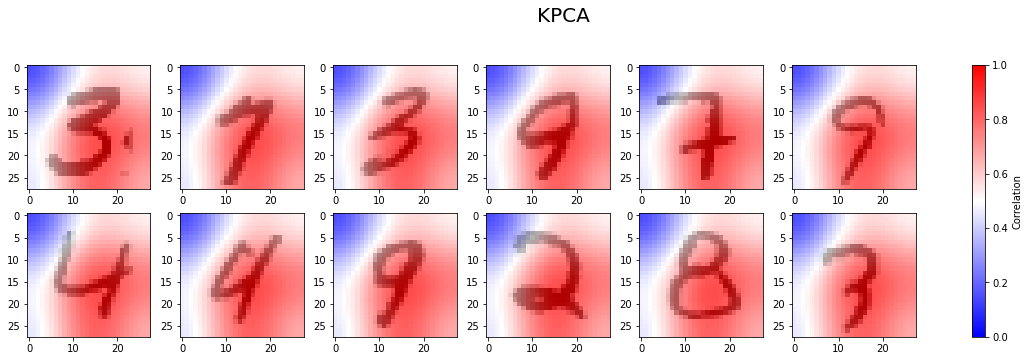

In [95]:
plot_most_correlated_pixels(dim_technique='KPCA')

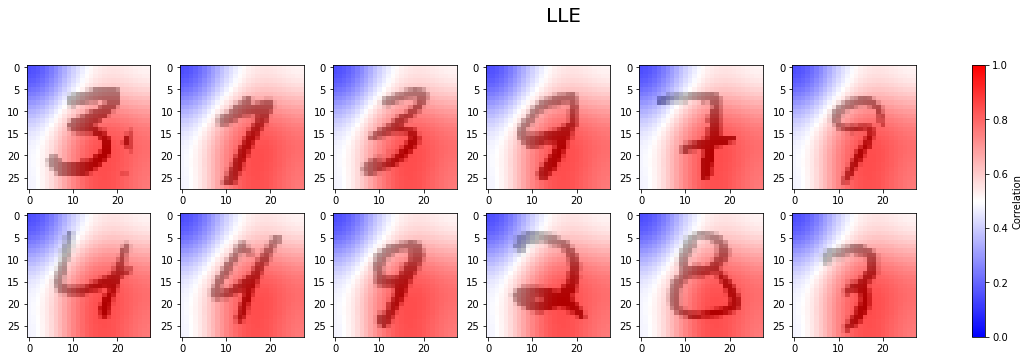

In [96]:
plot_most_correlated_pixels(dim_technique='LLE')

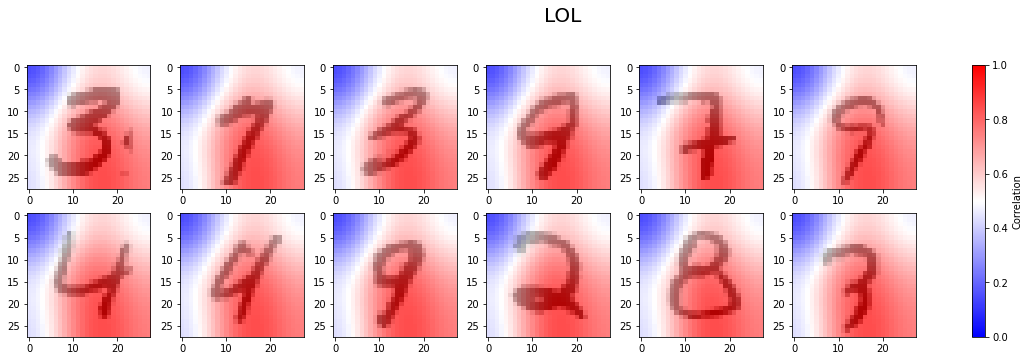

In [97]:
plot_most_correlated_pixels(dim_technique='LOL')

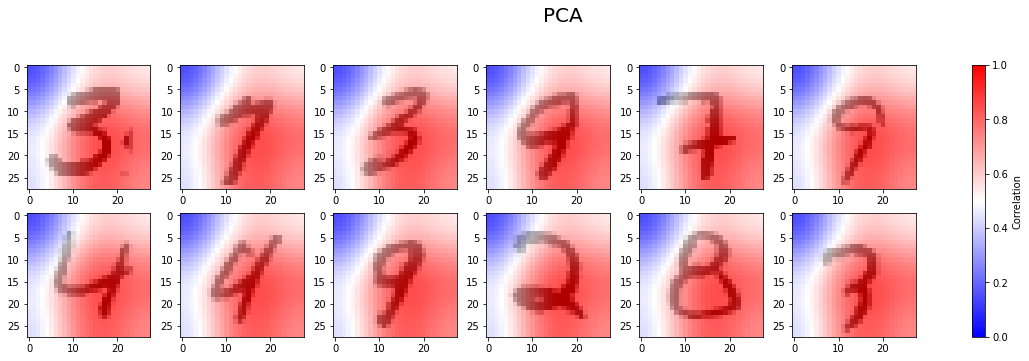

In [98]:
plot_most_correlated_pixels(dim_technique='PCA')